In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('AMZN.csv')

In [3]:
data.shape 

(6731, 7)

In [4]:
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-27,0.075521,0.082292,0.072917,0.079167,0.079167,173952000
1,1997-05-28,0.081250,0.081771,0.076563,0.076563,0.076563,91488000
2,1997-05-29,0.077083,0.077083,0.073958,0.075260,0.075260,69456000
3,1997-05-30,0.075000,0.075521,0.073958,0.075000,0.075000,51888000
4,1997-06-02,0.075521,0.076563,0.075000,0.075521,0.075521,11832000


In [5]:
data.index 

RangeIndex(start=0, stop=6731, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

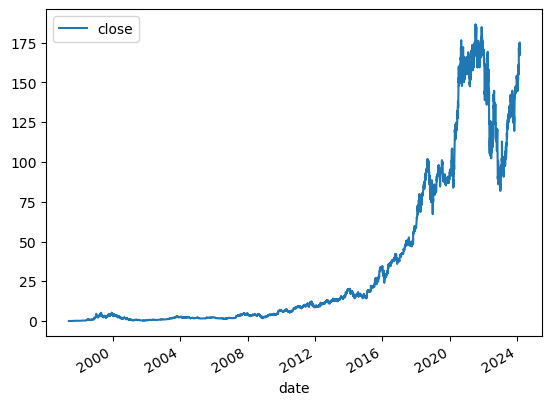

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('amazon.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,6731.000000,6731.000000,6731.000000,6731.000000,6.731000e+03
mean,35.052603,35.472441,34.599975,35.046316,1.393593e+08
std,50.876720,51.469654,50.232722,50.856841,1.378569e+08
min,0.070833,0.074479,0.068750,0.070833,9.744000e+06
25%,2.059250,2.098250,2.017250,2.057750,6.647200e+07
50%,7.892000,8.042500,7.771000,7.889000,1.032080e+08
75%,48.073250,48.486750,47.748251,48.220499,1.578530e+08
max,187.199997,188.654007,184.839493,186.570496,2.086584e+09


In [12]:
data['Tomorrow']=data['close'].shift(-1)

In [13]:
data['previousday']=data['close'].shift(1)

In [14]:
data.head() 

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
1997-05-27,0.075521,0.082292,0.072917,0.079167,173952000,0.076563,NaN
1997-05-28,0.081250,0.081771,0.076563,0.076563,91488000,0.075260,0.079167
1997-05-29,0.077083,0.077083,0.073958,0.075260,69456000,0.075000,0.076563
1997-05-30,0.075000,0.075521,0.073958,0.075000,51888000,0.075521,0.075260
1997-06-02,0.075521,0.076563,0.075000,0.075521,11832000,0.073958,0.075000


In [15]:
train = data.iloc[:-1000]
test = data.iloc[-1000:]

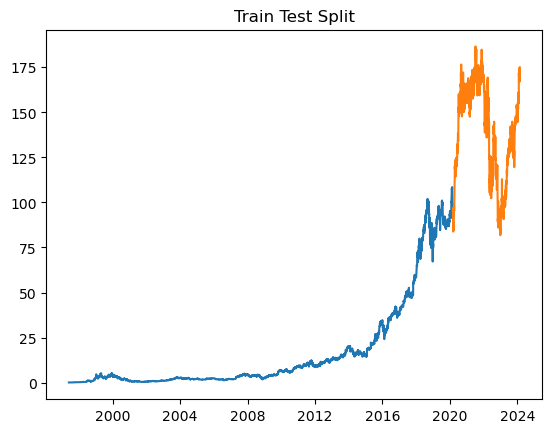

In [16]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [17]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [18]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [19]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 33.81
MAPE: 0.22
minae: 0.02
maxae: 78.85
medae: 37.76

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 33.90
MAPE: 0.22
minae: 0.01
maxae: 78.81
medae: 37.92

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 33.87
MAPE: 0.22
minae: 0.01
maxae: 78.65
medae: 37.91

Learning rate set to 0.350736
0:	learn: 17.2815983	total: 155ms	remaining: 15.3s
1:	learn: 11.5273514	total: 159ms	remaining: 7.8s
2:	learn: 7.7885263	total: 162ms	remaining: 5.25s
3:	learn: 5.2782823	total: 165ms	remaining: 3.96s
4:	learn: 3.6316957	total: 169ms	remaining: 3.22s
5:	learn: 2.6498367	total: 173ms	remaining: 2.72s
6:	learn: 2.0304107	total: 176ms	remaining: 2.34s
7:	learn: 1.6645999	total: 179ms	remaining: 2.06s
8:	learn: 1.4340343	total: 182ms	remaining: 1.84s
9:	learn: 1.2620700	total: 186ms	remaining: 1.67s
10:	learn: 1.1762644	total: 189ms	

#### Retrain the best Model(Extreme Gradient Boosting)

In [20]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [21]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [22]:
#combined_1.plot();
combined_2

,close,0
date,,
2020-03-05,96.201500,96.343890
2020-03-06,95.054497,94.567310
2020-03-09,90.030502,91.149064
2020-03-10,94.591003,93.515813
2020-03-11,91.042999,92.159591
...,...,...
2024-02-16,169.509995,108.155656
2024-02-20,167.080002,108.155656
2024-02-21,168.589996,108.155656


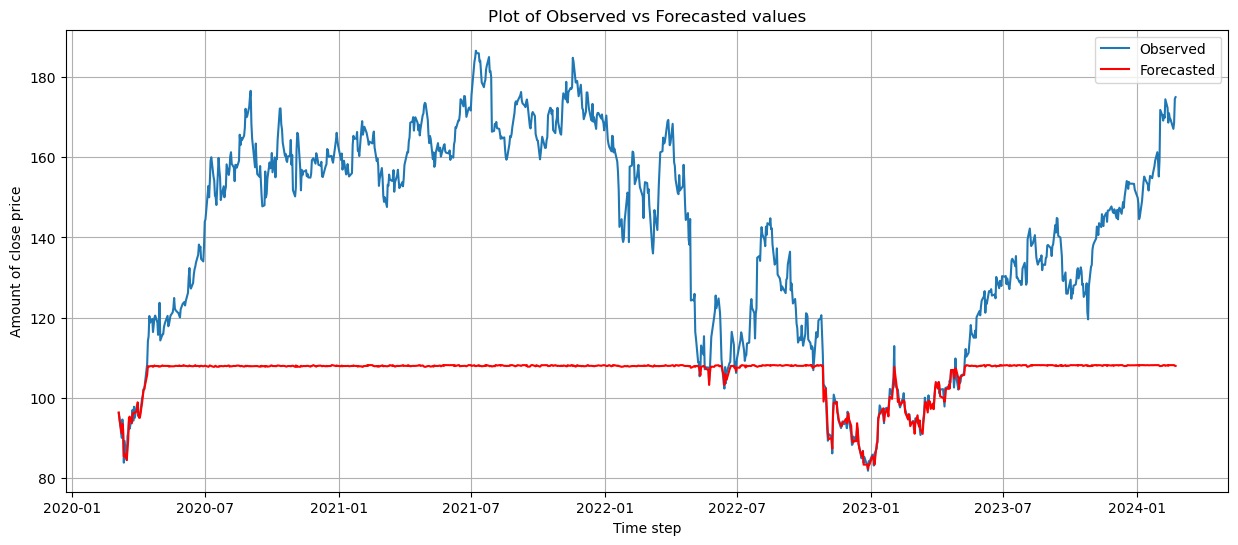

In [23]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [24]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [25]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [26]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [27]:
data['RSI']= computeRSI(data['close'], 14)

In [28]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
1997-05-27,0.075521,0.082292,0.072917,0.079167,173952000,0.076563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-28,0.081250,0.081771,0.076563,0.076563,91488000,0.075260,0.079167,0.983279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-29,0.077083,0.077083,0.073958,0.075260,69456000,0.075000,0.076563,0.991418,0.155730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-30,0.075000,0.075521,0.073958,0.075000,51888000,0.075521,0.075260,0.998270,0.151823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-06-02,0.075521,0.076563,0.075000,0.075521,11832000,0.073958,0.075000,1.003461,0.150260,0.989762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.shape 

(6731, 19)

In [30]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
1997-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079167,NaN
1997-05-28,0.983279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076563,NaN
1997-05-29,0.991418,0.155730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075260,NaN
1997-05-30,0.998270,0.151823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075000,NaN
1997-06-02,1.003461,0.150260,0.989762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075521,NaN


In [31]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [32]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [33]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [34]:
new_data=new_data.dropna()
new_data.shape 

(5731, 16)

In [35]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
2001-05-14,0.951803,1.4650,0.902872,3.8705,1.050827,38.114250,0.480605,348.985344,0.382386,1742.416714,0.6665,-0.136099,0.710500,0.720500,1.741342,0.717638
2001-05-15,1.007815,1.4005,0.951110,3.6910,1.067588,38.055750,0.491540,346.698719,0.388276,1743.004047,0.6770,-0.113294,0.692500,0.702125,1.740280,0.715655
2001-05-16,1.021323,1.3435,1.004979,3.5590,1.111727,38.048375,0.516050,344.325719,0.405048,1743.604484,0.7065,-0.104563,0.683333,0.696000,1.739249,0.715209
2001-05-17,1.022484,1.3835,1.048822,3.5150,1.158549,38.129875,0.542790,342.263469,0.423520,1744.235724,0.7390,-0.124926,0.707500,0.697250,1.738253,0.716369
2001-05-18,0.997966,1.4455,1.043972,3.5230,1.149667,38.272000,0.543553,340.371219,0.421641,1744.899724,0.7360,-0.139684,0.727167,0.714625,1.737255,0.717327


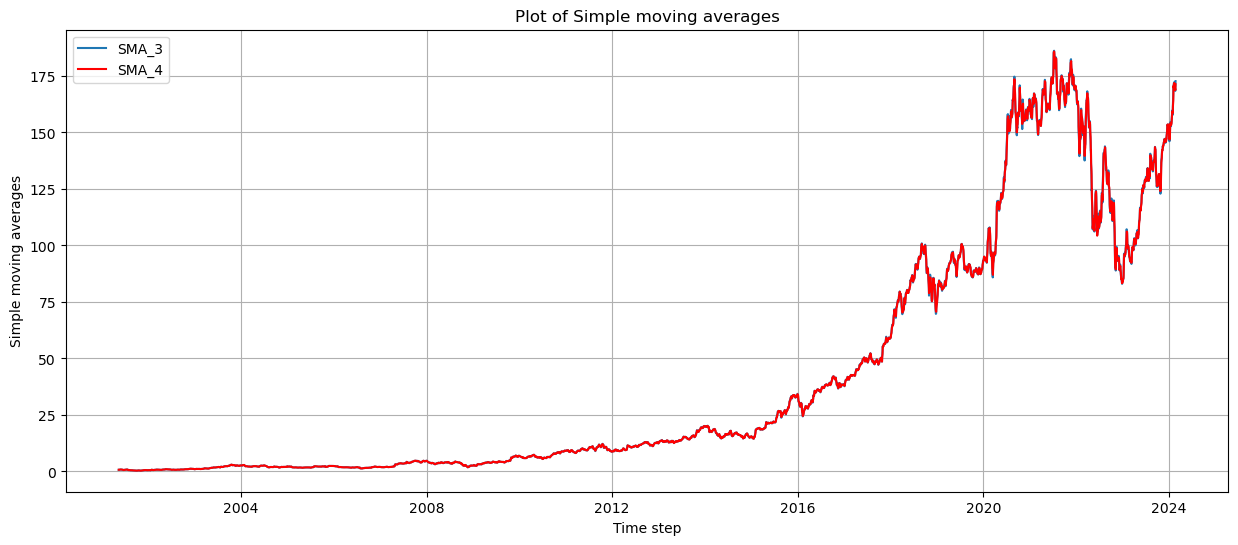

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

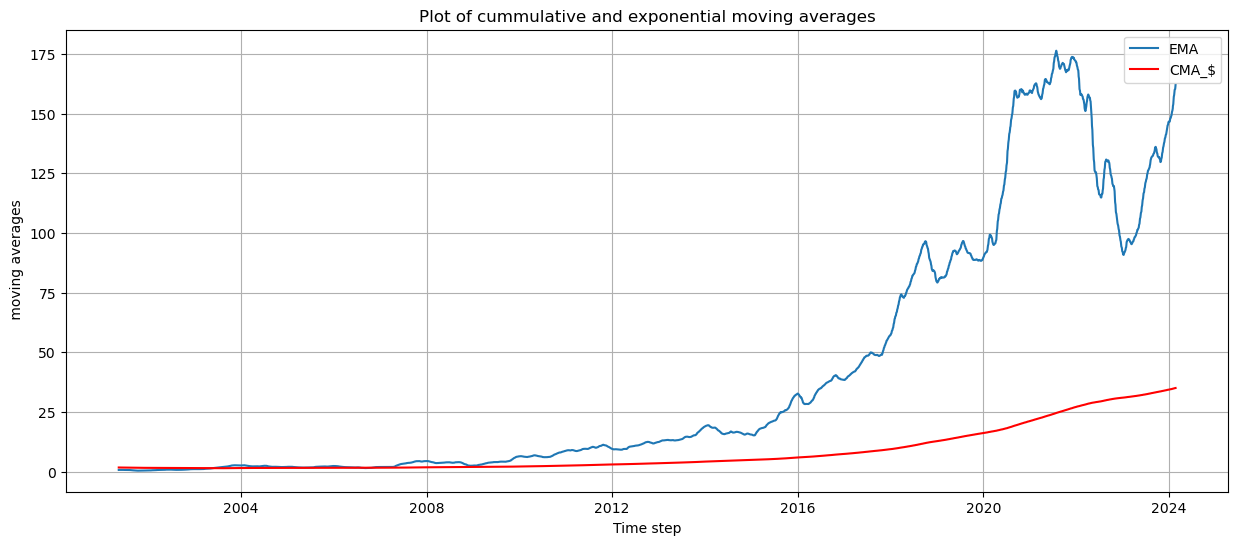

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

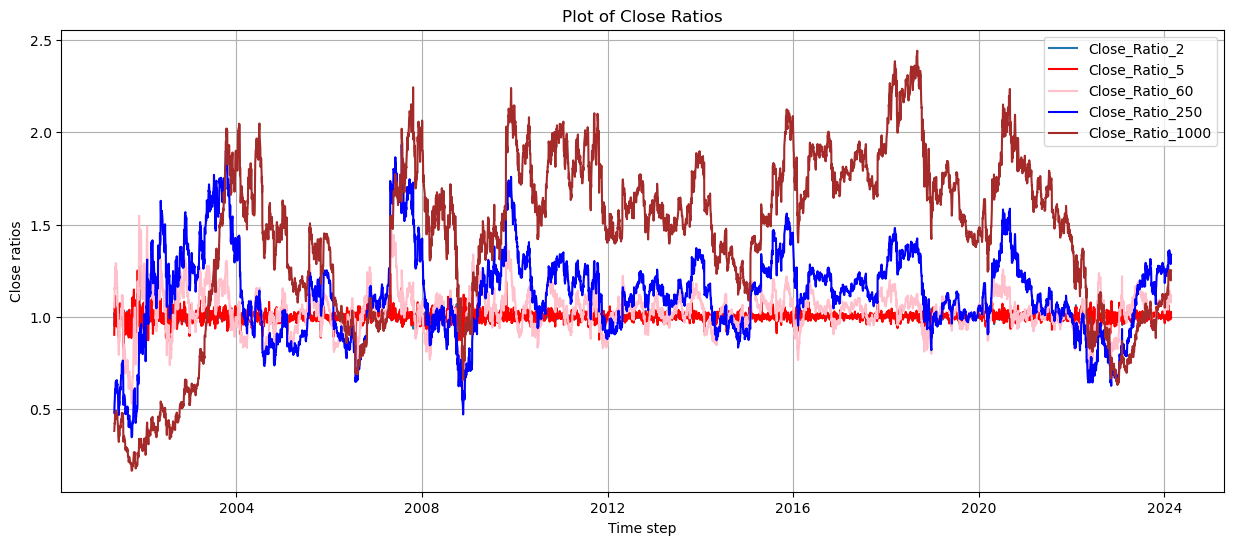

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

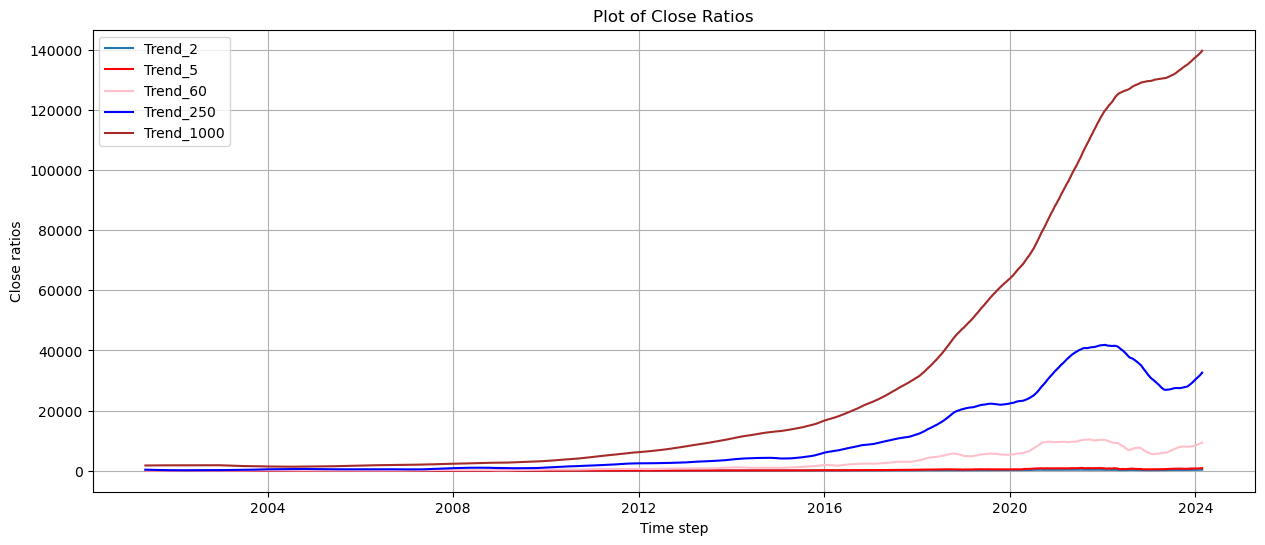

In [39]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [40]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['previousday']

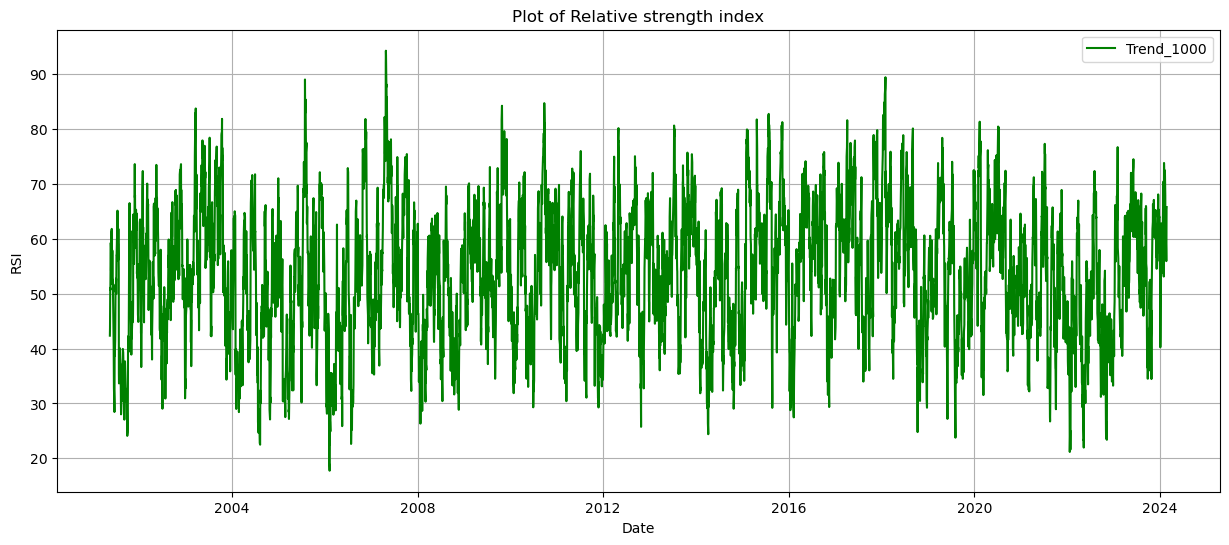

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

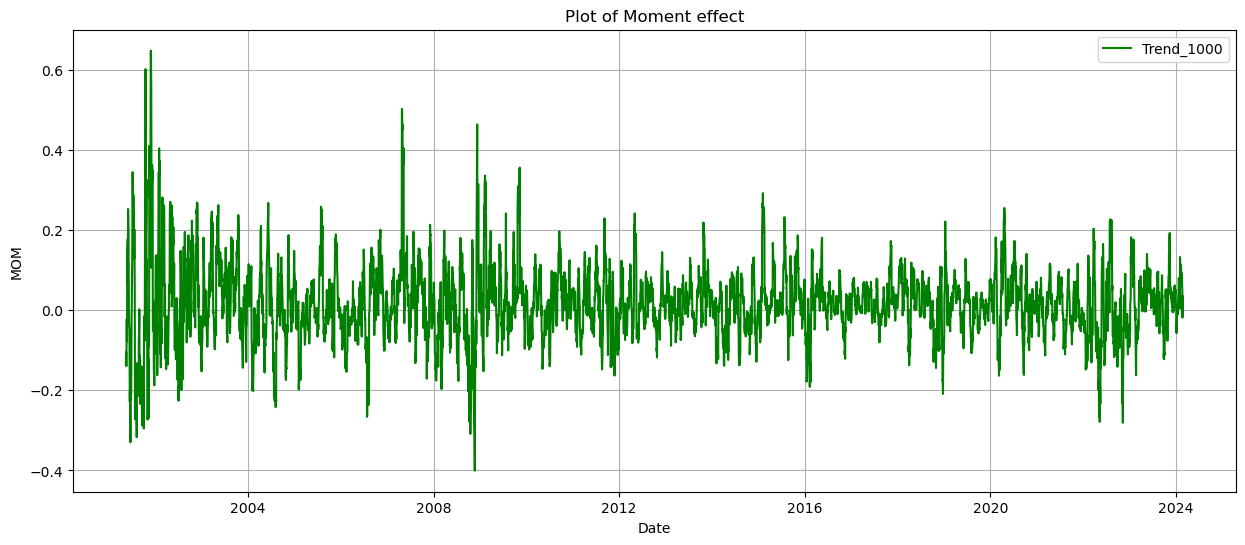

In [42]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

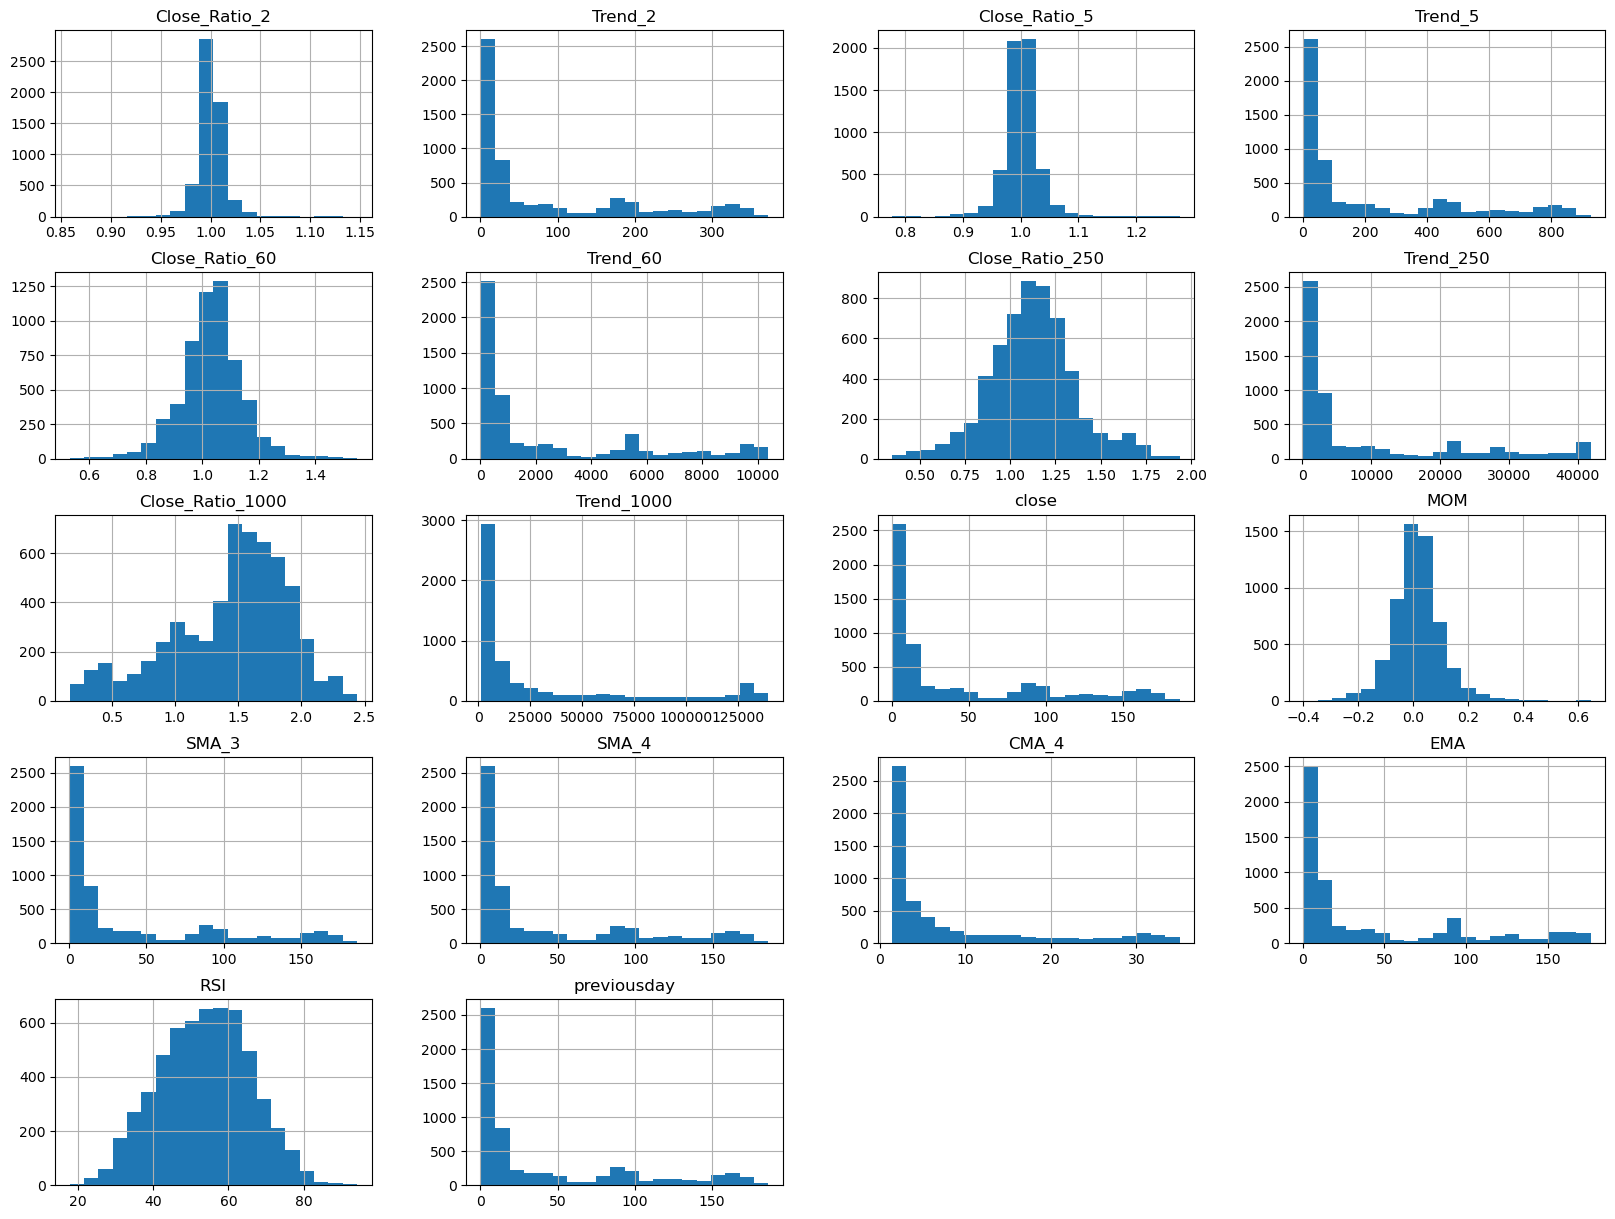

In [43]:
columns= ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday']


new_data[columns].hist( bins=20, figsize=(20,15))
plt.savefig('charts_1.png');

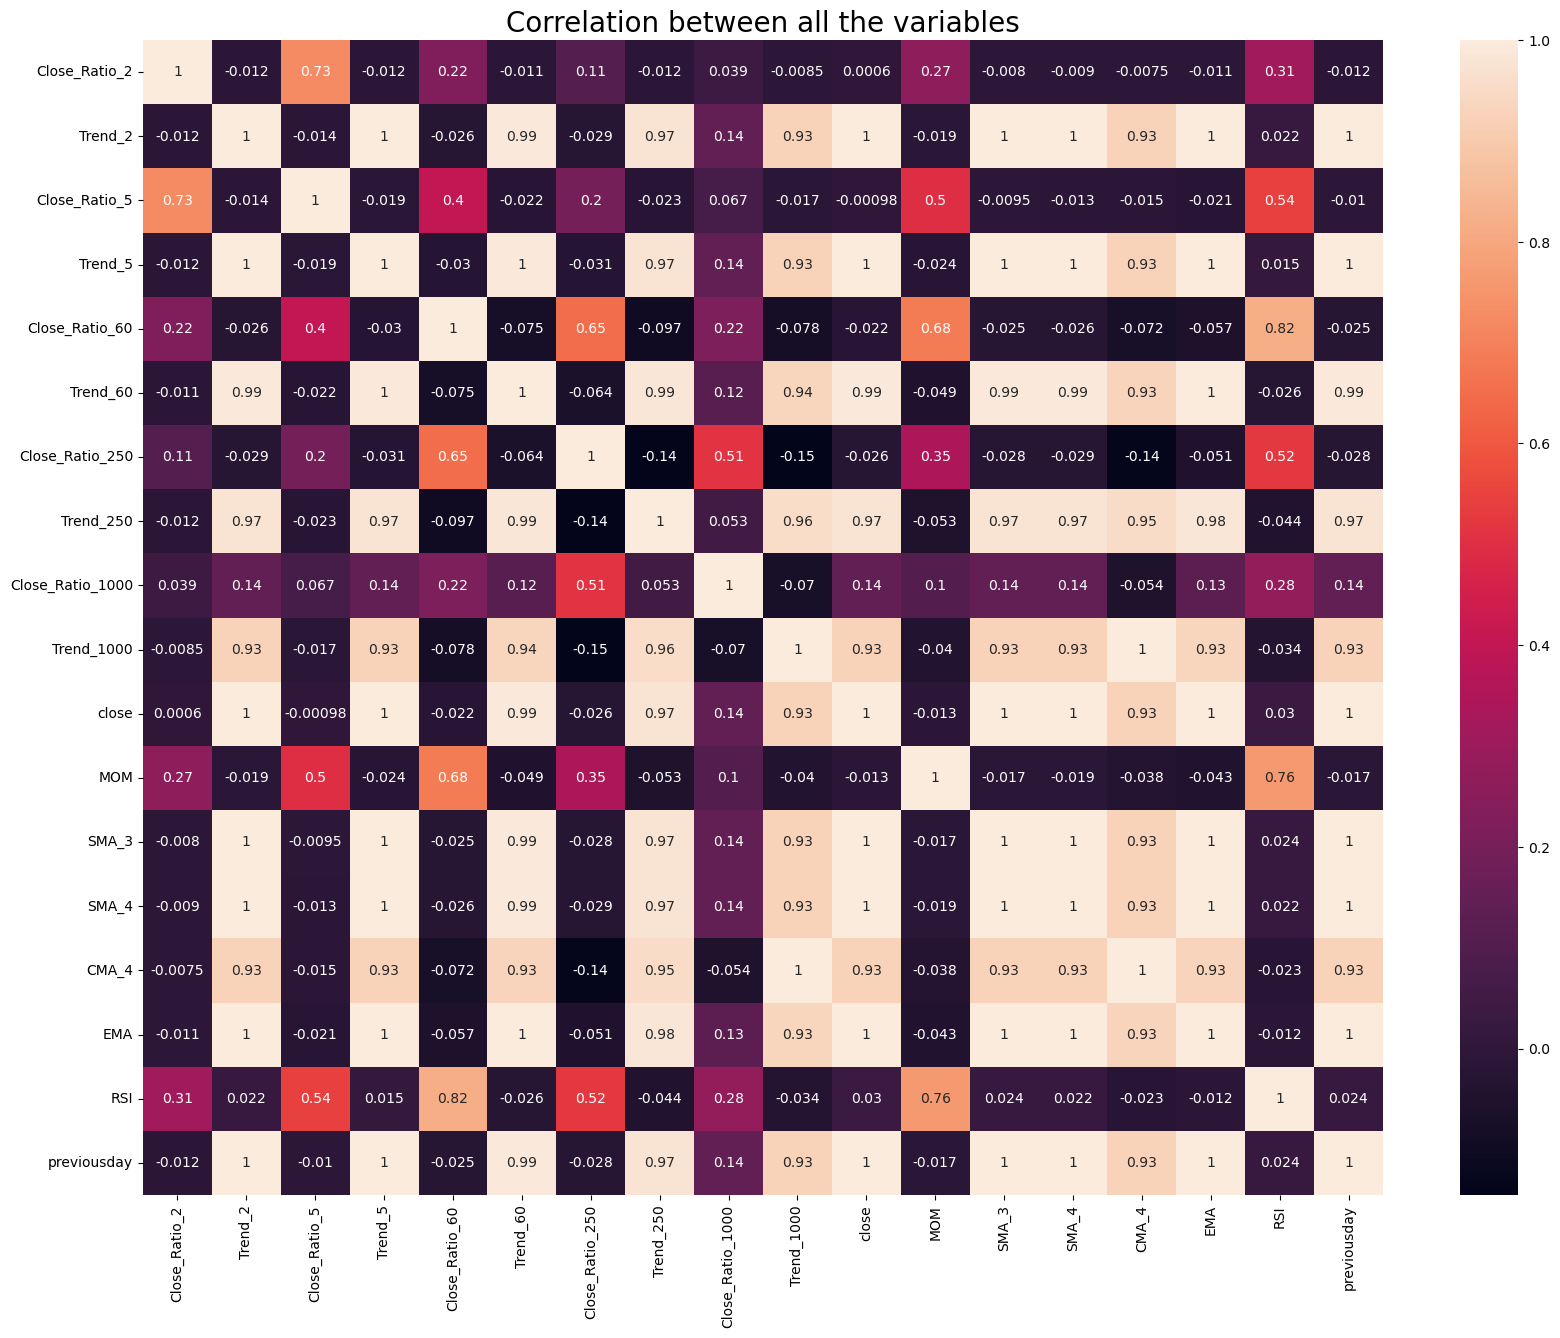

In [44]:
plt.figure(figsize= [20,15])
sns.heatmap(data=new_data.corr(), annot=True)
plt.title('Correlation between all the variables', fontsize=20); 

In [45]:
train = new_data.iloc[:-1000]
test = new_data.iloc[-1000:]

In [46]:
train.shape

(4731, 18)

In [47]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [48]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM', 'previousday'] 

In [49]:
train[predictors].head()

,SMA_3,SMA_4,EMA,RSI,MOM,previousday
date,,,,,,
2001-05-14,0.710500,0.720500,0.717638,42.338604,-0.136099,0.7340
2001-05-15,0.692500,0.702125,0.715655,43.656147,-0.113294,0.6665
2001-05-16,0.683333,0.696000,0.715209,47.299585,-0.104563,0.6770
2001-05-17,0.707500,0.697250,0.716369,51.054689,-0.124926,0.7065
2001-05-18,0.727167,0.714625,0.717327,50.695601,-0.139684,0.7390


#### Retrain the models on the new predictors

In [50]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 35.67
MAPE: 0.23
minae: 0.03
maxae: 79.44
medae: 40.09

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 37.27
MAPE: 0.24
minae: 0.00
maxae: 79.80
medae: 41.88

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 36.49
MAPE: 0.24
minae: 0.00
maxae: 79.06
medae: 41.11

Learning rate set to 0.340269
0:	learn: 18.5395763	total: 3.46ms	remaining: 343ms
1:	learn: 12.6329394	total: 6.31ms	remaining: 309ms
2:	learn: 8.5748685	total: 9.07ms	remaining: 293ms
3:	learn: 6.0044298	total: 11.9ms	remaining: 286ms
4:	learn: 4.2110832	total: 14.8ms	remaining: 281ms
5:	learn: 3.0867252	total: 17.6ms	remaining: 275ms
6:	learn: 2.3713775	total: 20.9ms	remaining: 278ms
7:	learn: 1.9305220	total: 23.6ms	remaining: 271ms
8:	learn: 1.6890662	total: 26.3ms	remaining: 266ms
9:	learn: 1.4658770	total: 29.5ms	remaining: 265ms
10:	learn: 1.3559688	total: 32ms	remaining: 259ms
11:	learn: 1.27

#### Improving the model

In [51]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [52]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [53]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [54]:
predictions_2 = backtest(new_data, model_2, predictors)

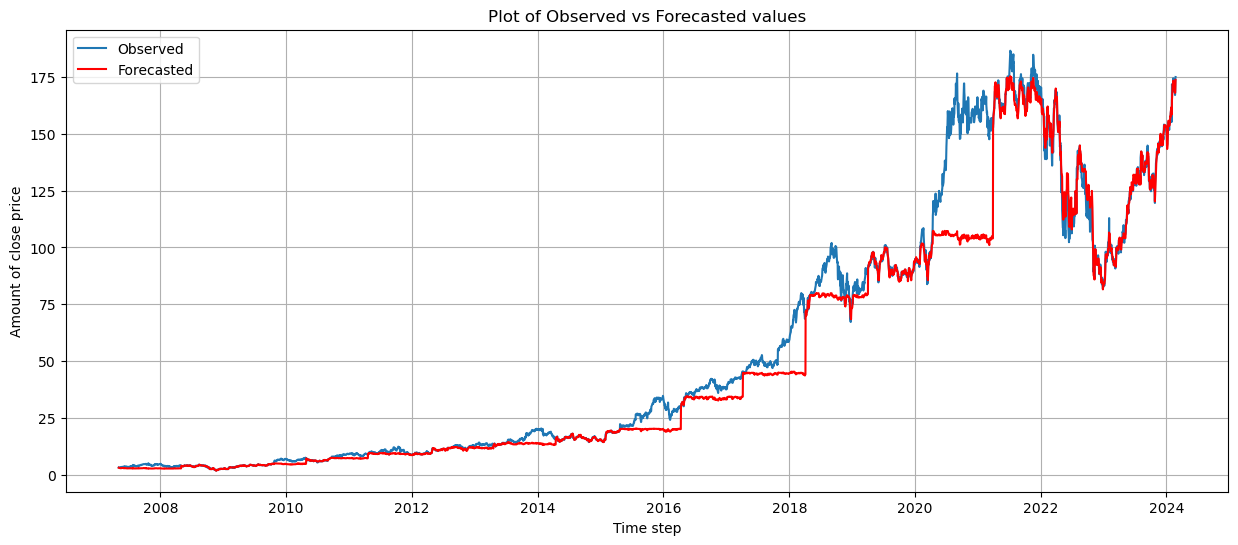

In [55]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [56]:
model_2.fit(train[predictors], train['close'])
prediction=model_2.predict(test[predictors])

In [57]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [58]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.23531540812553084

mean absolute  error is : 36.493208601703806



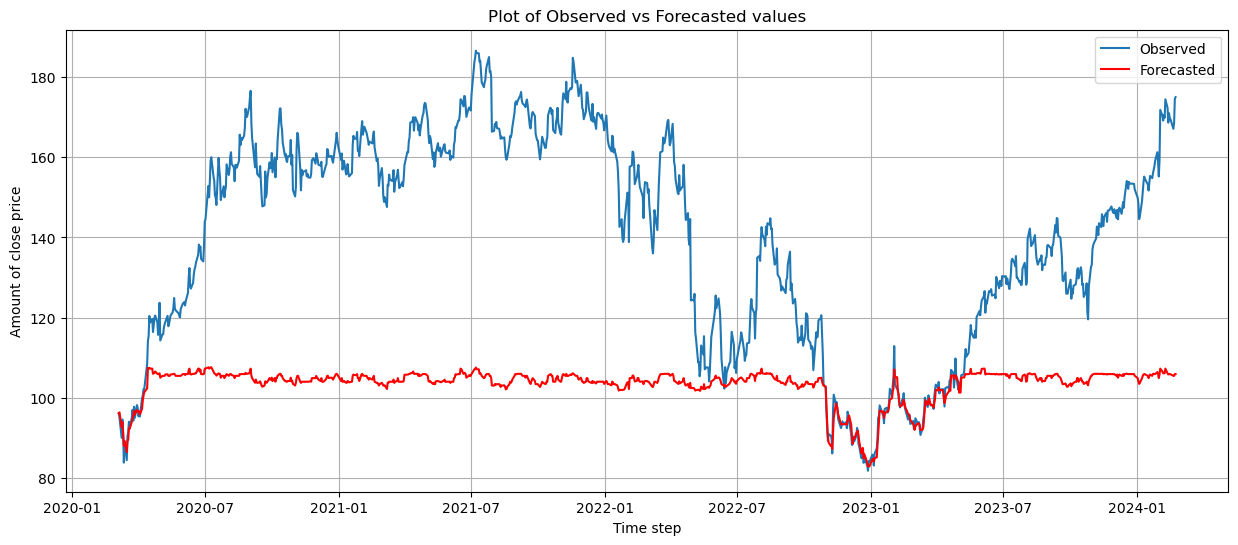

In [59]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

In [89]:
#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

0.4295694720011758
GradientBoostingRegressor(max_depth=5, n_estimators=300)


In [60]:
model = GradientBoostingRegressor(max_depth=7, n_estimators=350,  min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [61]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [62]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 36.77331108089465 
 gradientboost minae: 0.001262375407378613 
 gradientboost maxae: 80.04581214774632 
 gradientboost medae: 41.40869502351693 
 gradientboost Mape: 0.23726023689583498 
  

 <-------------------------------------------------->



In [63]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2020-03-05,96.201500,95.780053
2020-03-06,95.054497,95.970893
2020-03-09,90.030502,92.131364
2020-03-10,94.591003,93.471657
2020-03-11,91.042999,90.847432
...,...,...
2024-02-16,169.509995,105.172888
2024-02-20,167.080002,104.756663
2024-02-21,168.589996,104.623811


In [64]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [65]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.23726023689583498

mean absolute  error is : 36.77331108089465



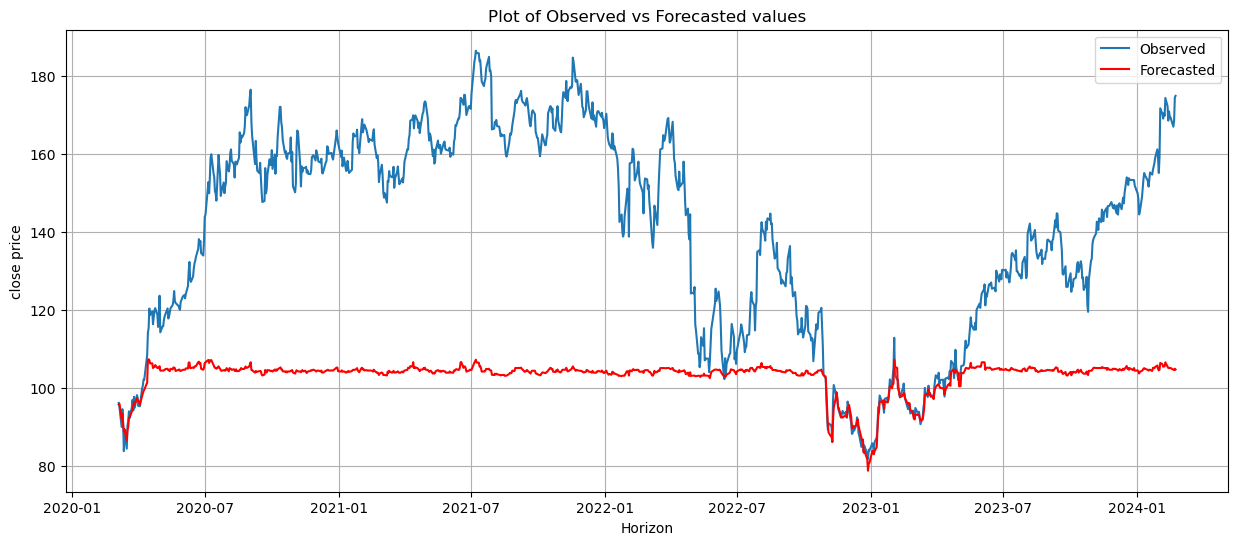

In [66]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('close price')
plt.xlabel('Horizon')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [67]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")

#note the codes for the stacking and bagging ensemble algorithm



#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 35.330062131099986 
 bagging minae: 0.02899879999999655 
 bagging maxae: 79.05719539999998 
 bagging medae: 39.76080209999998 
 bagging Mape: 0.2273579714542082 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 1.3188446406958658 
 stacking minae: 0.0020499539822367296 
 stacking maxae: 10.443057765222818 
 stacking medae: 1.0208663147645751 
 stacking mape: 0.009784615595389167 



In [68]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [69]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [70]:
combined_bagg.head()

,close,0
date,,
2020-03-05,96.201500,95.910098
2020-03-06,95.054497,95.535699
2020-03-09,90.030502,93.092399
2020-03-10,94.591003,92.348450
2020-03-11,91.042999,90.359852


In [71]:
combined_stack

,close,0
date,,
2020-03-05,96.201500,95.164314
2020-03-06,95.054497,97.589746
2020-03-09,90.030502,91.007816
2020-03-10,94.591003,94.781295
2020-03-11,91.042999,88.956752
...,...,...
2024-02-16,169.509995,170.492649
2024-02-20,167.080002,167.076567
2024-02-21,168.589996,168.553315


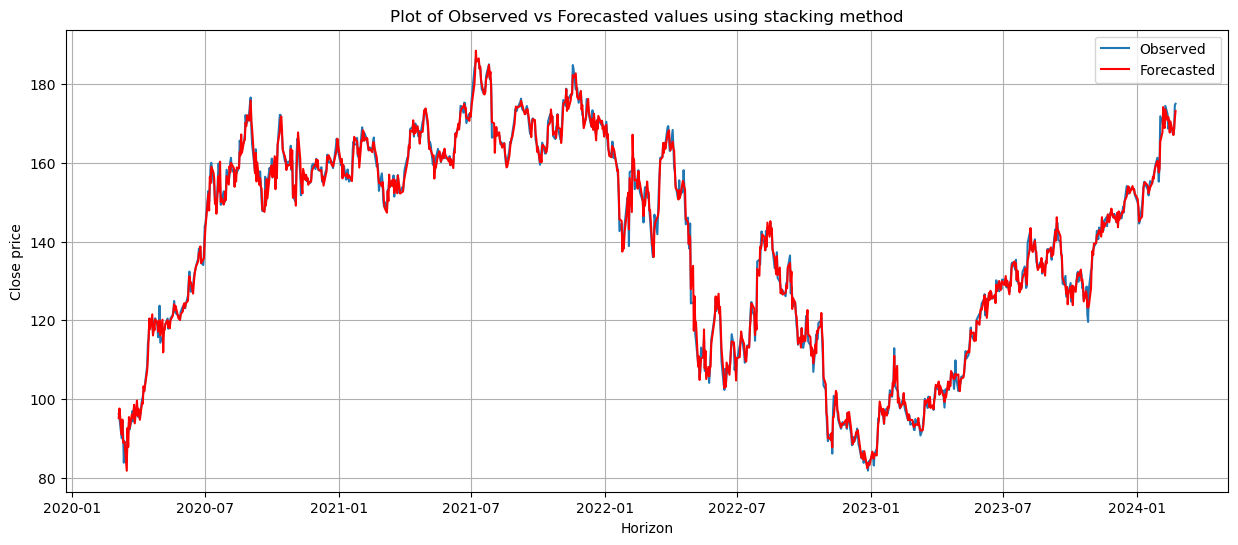

In [72]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Close price')
plt.xlabel('Horizon')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

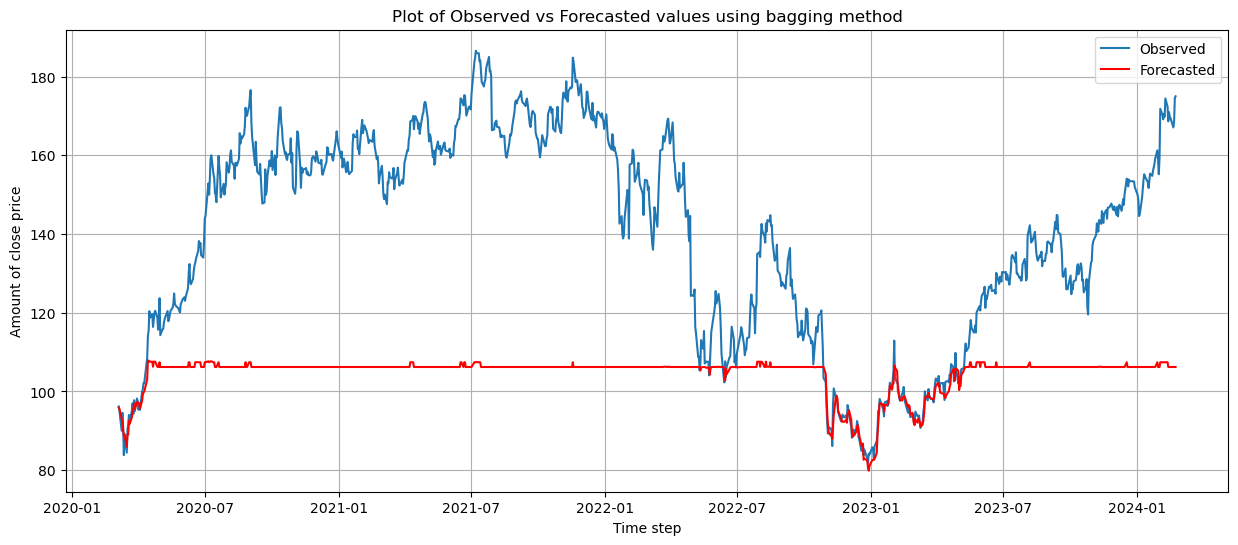

In [73]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

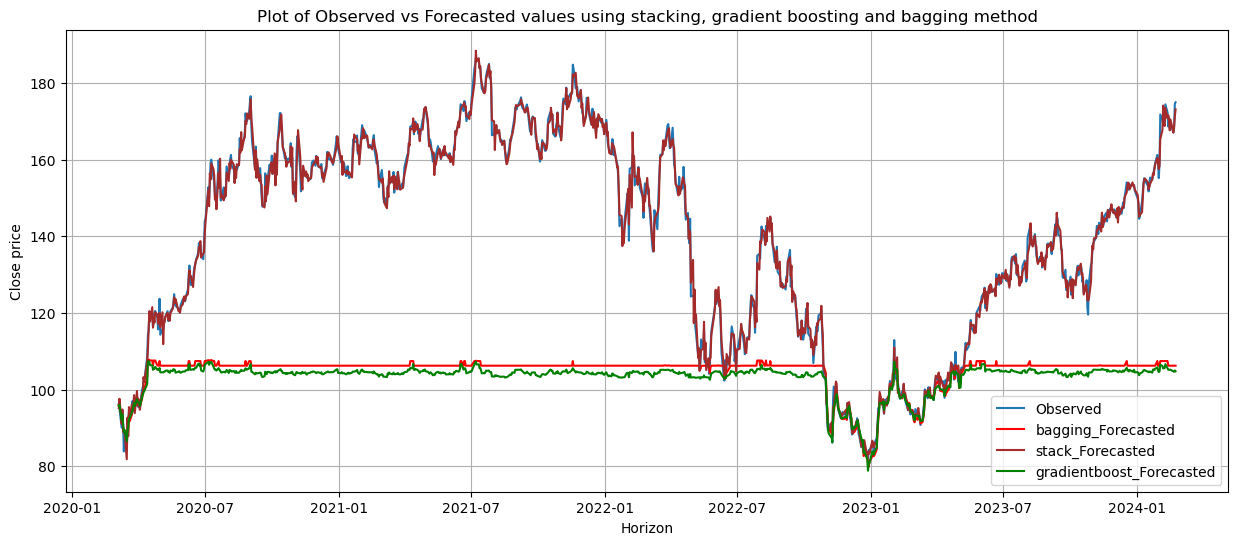

In [74]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Close price')
plt.xlabel('Horizon')
plt.legend()
plt.grid()
#plt.savefig('forcast.png')
plt.savefig('new_amazon result.png')
plt.show()

In [75]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 35.67, 0.23, 0.03, 79.44, 40.9])
task1_result.add_row(['XGboost', 37.27, 0.24, 0.00, 79.80, 41.88])
task1_result.add_row(['GradientBoost', 36.49,0.24, 0.00, 79.06, 41.11])
task1_result.add_row(['Catboost', 39.41, 0.26, 0.02, 82.09, 44.53])
task1_result.add_row(['Bagging', 35.33, 0.23, 0.03, 79.06, 39.76])
task1_result.add_row(['Stacking', 1.33, 0.01, 0.01, 10.12, 1.01])

print('Result Summary for All Regressors :')
print(task1_result)


Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |    35.67    |     0.23     |      0.03     |     79.44     |      40.9     |
|    XGboost    |    37.27    |     0.24     |      0.0      |      79.8     |     41.88     |
| GradientBoost |    36.49    |     0.24     |      0.0      |     79.06     |     41.11     |
|    Catboost   |    39.41    |     0.26     |      0.02     |     82.09     |     44.53     |
|    Bagging    |    35.33    |     0.23     |      0.03     |     79.06     |     39.76     |
|    Stacking   |     1.33    |     0.01     |      0.01     |     10.12     |      1.01     |
+---------------+-------------+--------------+---------------+---------------+---------------+


In [76]:
train[predictors].head()

,SMA_3,SMA_4,EMA,RSI,MOM,previousday
date,,,,,,
2001-05-14,0.710500,0.720500,0.717638,42.338604,-0.136099,0.7340
2001-05-15,0.692500,0.702125,0.715655,43.656147,-0.113294,0.6665
2001-05-16,0.683333,0.696000,0.715209,47.299585,-0.104563,0.6770
2001-05-17,0.707500,0.697250,0.716369,51.054689,-0.124926,0.7065
2001-05-18,0.727167,0.714625,0.717327,50.695601,-0.139684,0.7390


In [77]:
input_data = (0.710500,0.720500,0.717638,42.338604,-0.136099,0.7340)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = stacking_model.predict(input_data_reshaped)
print(prediction)


[0.66908695]


In [78]:
#create a pickle file
import pickle
filename = 'performance_model.sav'
pickle.dump(stacking_model, open(filename, 'wb'))

In [79]:
#import joblib

In [80]:
#filename= 'stockmodel.pkl'

In [81]:
#joblib.dump(stacking_model, filename)

In [84]:
new_data[predictors].head()

,SMA_3,SMA_4,EMA,RSI,MOM,previousday
date,,,,,,
2001-05-14,0.710500,0.720500,0.717638,42.338604,-0.136099,0.7340
2001-05-15,0.692500,0.702125,0.715655,43.656147,-0.113294,0.6665
2001-05-16,0.683333,0.696000,0.715209,47.299585,-0.104563,0.6770
2001-05-17,0.707500,0.697250,0.716369,51.054689,-0.124926,0.7065
2001-05-18,0.727167,0.714625,0.717327,50.695601,-0.139684,0.7390
